# **COLLABORATIVE FILTERING USING THE NETFLIX DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
columns = ['MovieID','UserID', 'Rating']
train = pd.read_csv('TrainingRatings.txt', names=columns)
test = pd.read_csv('TestingRatings.txt', names = columns)

In [3]:
train.head()

,MovieID,UserID,Rating
0,8,1744889,1.0
1,8,1395430,2.0
2,8,1205593,4.0
3,8,1488844,4.0
4,8,1447354,1.0


In [4]:
test.head()

,MovieID,UserID,Rating
0,8,573364,1.0
1,8,2149668,3.0
2,8,1089184,3.0
3,8,2465894,3.0
4,8,534508,1.0


In [5]:
train.shape

(3255352, 3)

In [6]:
test.shape

(100478, 3)

In [7]:
print(train.info())
print('\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255352 entries, 0 to 3255351
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   MovieID  int64  
 1   UserID   int64  
 2   Rating   float64
dtypes: float64(1), int64(2)
memory usage: 74.5 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100478 entries, 0 to 100477
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MovieID  100478 non-null  int64  
 1   UserID   100478 non-null  int64  
 2   Rating   100478 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB
None


In [8]:
movie = pd.read_csv('movie_titles.txt', encoding = "ISO-8859-1", names = ['MovieID', 'Year', 'Name'])
movie.head()

,MovieID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MovieID  17770 non-null  int64  
 1   Year     17763 non-null  float64
 2   Name     17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


## **Data Visualization**

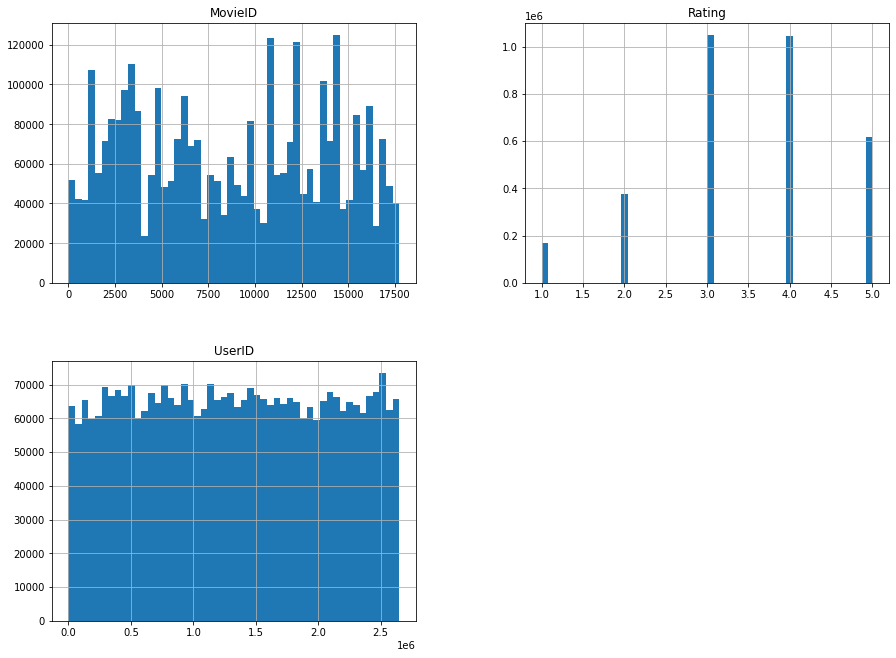

In [10]:
train.hist(bins = 50,figsize = (15,11))
plt.show()

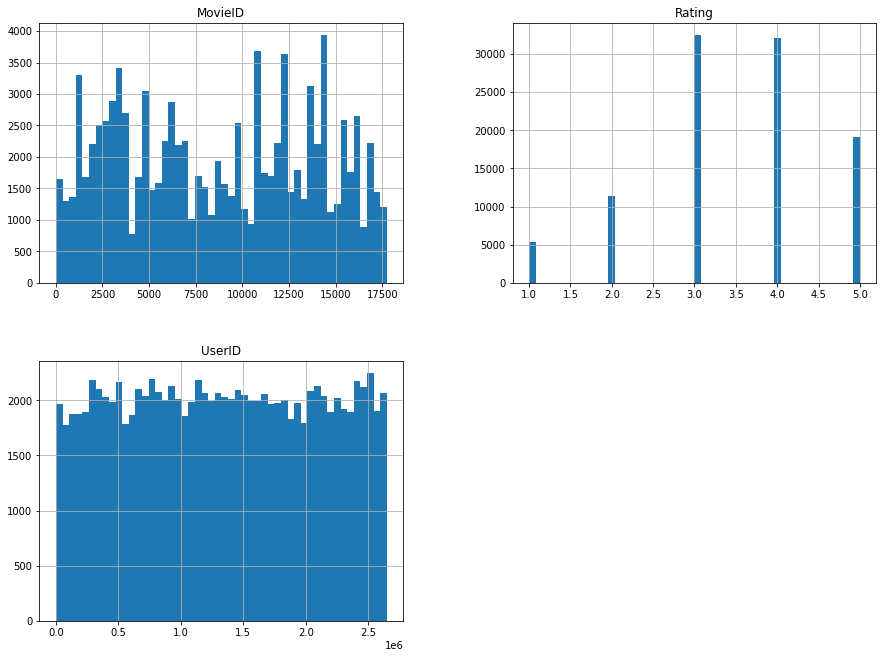

In [11]:
test.hist(bins = 50,figsize = (15,11))
plt.show()

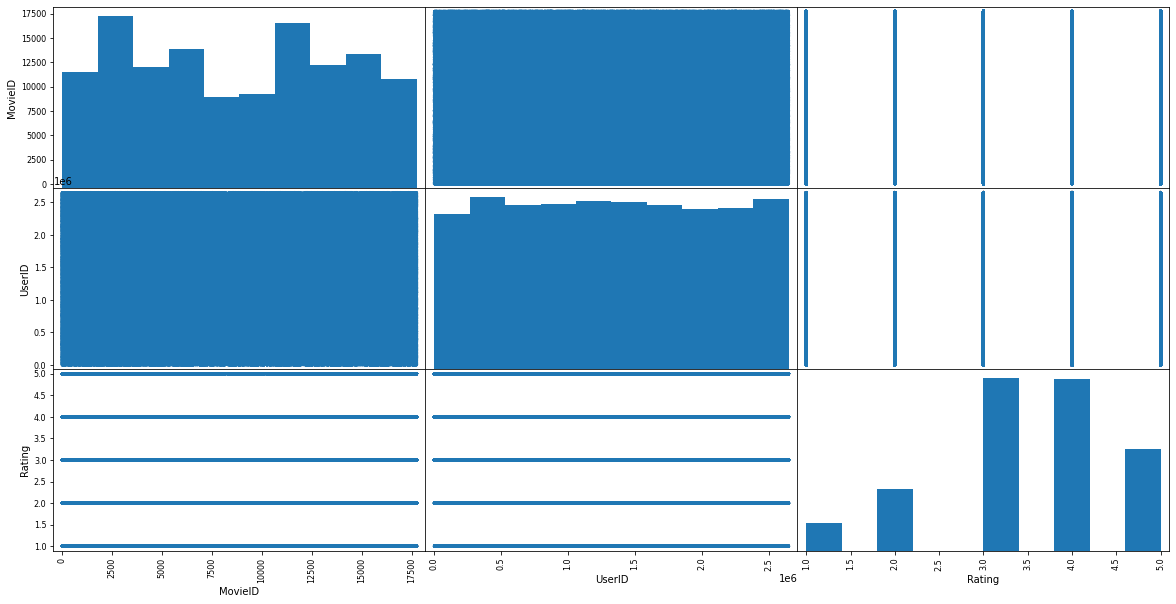

In [12]:
#Scatter matrix of train data
from pandas.plotting import scatter_matrix
scatter_matrix(train, figsize=(20,10))
plt.show()

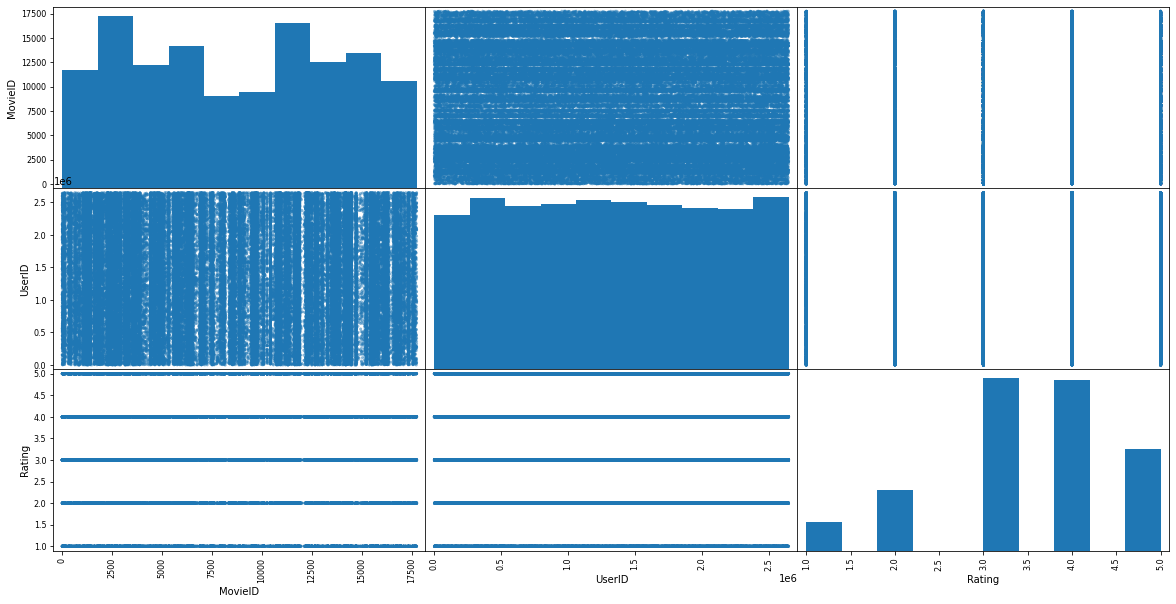

In [13]:
#Scatter matrix of test data
scatter_matrix(test,figsize=(20,10))
plt.show()

## **Problem 2: Analyzing the Netflix Data**

In [0]:
#dropping duplicates in the data if any
train.drop_duplicates(keep = "first", inplace = True)
test.drop_duplicates(keep = "first", inplace = True)

In [11]:
movie0 = train['MovieID'].nunique()
user0 = train['UserID'].nunique()
rate0 = train['Rating'].nunique()

print("TRAINING DATA:")
print("\nCount of Unique Movies :",movie0)
print("Count of Unique Users :",user0)
print("Count of Unique Ratings :",rate0)

TRAINING DATA:

Count of Unique Movies : 1821
Count of Unique Users : 28978
Count of Unique Ratings : 5


In [12]:
movie1 = test['MovieID'].nunique()
rate1 = test['Rating'].nunique()
user1 = test['UserID'].nunique()

print("TEST DATA:")
print("\nCount of Unique Movies :",movie1)
print("Count of Unique Ratings :",rate1)
print("Count of Unique Users :",user1)

TEST DATA:

Count of Unique Movies : 1701
Count of Unique Ratings : 5
Count of Unique Users : 27555


In [13]:
train['UserID'].unique()

array([1744889, 1395430, 1205593, ...,  571547, 2080843, 2383861])

In [14]:
user2080843 = train[(train['UserID'] == 2080843) & (train['Rating'] == 5)]
user2080843 = user2080843.set_index('MovieID')
user2080843 = user2080843.join(movie)['Name']
print(user2080843)

MovieID
1615                The Flintstones: Season 2
2290                    Film School: Season 1
2660                       Wrath of the Ninja
2861                 The Silence of the Lambs
2913                                   Kasoor
2955                       Lie Down with Dogs
4385            The Return of the Living Dead
5562       Woodstock: 3 Days of Peace & Music
6281                                   Madman
6287                        Essence of Echoes
7445     The Office: Series 1: Bonus Material
7511                         Poor White Trash
7577                Who's the Boss?: Season 1
10662                Kipper: Friendship Tails
10947                             Easy Riders
11673                    The Name of the Rose
11812                             Cold & Dark
11837                                   Omagh
12497       Goosebumps: Welcome to Dead House
13614                       The Great Silence
14185                             Bitter Moon
14209                  Gra

In [15]:
user571547 = train[(train['UserID'] == 571547) & (train['Rating'] == 5)]
user571547 = user571547.set_index('MovieID')
user571547 = user571547.join(movie)['Name']
print(user571547)

MovieID
1744                                             Love Me
4432                                          Drive Well
4847     The Adventures of Jimmy Neutron: Sea of Trouble
5656                                   Billabong Odyssey
5814                                       Kill Me Later
6556                      Cezanne: Three Colours Cezanne
6971                                          Armageddon
7145                                       Light Sleeper
7406                    The Dick Cavett Show: Rock Icons
8384                                       Mistress Club
8512                                      American Crime
10429                                        Wagons East
10721                                            Creator
10921                                  The Little Prince
12355             Whales: An Unforgettable Journey: IMAX
13614                                  The Great Silence
13651                                    Project Grizzly
14209                  

In [16]:
train_pivot = pd.pivot_table(train,values='Rating',index='UserID',columns='MovieID')
train_pivot.shape

(28978, 1821)

In [17]:
train_pivot.describe()

MovieID,8,28,43,48,61,64,66,92,96,111,122,123,127,140,145,154,156,174,185,192,207,214,218,222,229,237,259,267,276,287,305,318,323,336,359,361,380,395,398,409,...,17337,17338,17344,17348,17358,17394,17411,17423,17447,17454,17466,17515,17522,17523,17534,17536,17551,17554,17556,17558,17561,17574,17616,17624,17626,17635,17640,17642,17650,17653,17654,17660,17689,17693,17706,17725,17728,17734,17741,17742
count,2831.000000,12244.000000,58.000000,1666.000000,57.000000,45.000000,65.000000,67.000000,146.000000,8605.000000,1429.000000,106.000000,1781.000000,41.000000,141.000000,58.000000,3397.000000,119.000000,1617.000000,100.000000,59.000000,68.000000,37.000000,42.000000,202.000000,179.000000,219.000000,552.000000,60.000000,67.000000,6324.000000,43.000000,443.000000,101.000000,1938.000000,6843.000000,312.000000,977.000000,913.000000,243.000000,...,35.000000,2956.000000,141.000000,472.000000,6794.000000,110.000000,3423.000000,1920.000000,245.000000,245.000000,485.000000,108.000000,502.000000,95.000000,48.000000,1538.000000,98.000000,515.000000,331.000000,8032.000000,989.000000,6786.000000,53.000000,2144.000000,65.000000,212.000000,97.000000,964.000000,752.000000,1713.000000,2686.000000,30.000000,31.000000,2534.000000,122.000000,2003.000000,68.000000,41.000000,1020.000000,246.000000
mean,3.055104,3.760127,2.310345,3.620648,2.385965,2.466667,2.138462,3.089552,3.013699,3.037304,2.902729,2.764151,2.626614,2.390244,2.992908,2.758621,3.354725,2.899160,2.976500,3.000000,2.559322,2.647059,2.621622,2.309524,3.480198,3.385475,3.155251,3.570652,1.966667,2.940299,3.502688,2.465116,2.446953,3.019802,4.079979,3.569341,2.974359,3.936540,2.825849,3.518519,...,3.285714,3.101827,2.773050,3.677966,3.280836,2.672727,3.715162,3.526042,3.089796,3.040816,2.391753,3.675926,3.450199,3.273684,2.166667,3.965540,1.877551,2.996117,2.507553,3.345244,3.114257,3.442823,3.245283,3.399254,3.400000,2.976415,2.907216,3.624481,3.159574,3.213076,3.007446,2.466667,2.064516,2.869771,3.254098,3.431353,2.691176,2.926829,3.205882,2.768293
std,1.282858,0.979763,1.216940,1.097704,1.305953,1.198484,0.949949,1.694298,1.248372,0.977729,1.030854,0.889643,1.069153,0.971546,1.180172,1.260887,1.018896,1.237788,1.134819,1.318095,1.207322,1.346801,1.515684,1.115043,1.250713,1.209518,1.076695,1.381262,0.973665,1.335762,0.978089,1.008271,1.150942,1.009754,1.106745,1.159197,0.951889,0.863695,1.121613,1.165387,...,1.202239,0.981789,1.016779,1.233856,0.900804,1.067528,0.913450,0.997312,1.044157,1.176254,0.984977,1.399791,0.948005,1.417535,1.373508,1.023845,0.922405,1.153570,1.173871,0.971236,0.998019,0.993295,0.958879,1.074074,1.308625,1.153774,1.208326,1.215196,0.970161,0.980900,1.094740,1.195778,1.062559,1.055324,1.314644,1.118215,1.187715,1.104315,1.048746,0.925363
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.500000,1.750000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,3.000000,1.000000,2.

## **Problem 3: Collaborative Filtering Implementation**

In [18]:
!pip install surprise

In [0]:
from surprise import Reader, Dataset, accuracy
from surprise.model_selection import cross_validate

In [0]:
results = []

In [0]:
reader = Reader(rating_scale=(1,5))

data = Dataset.load_from_df(train[[ 'MovieID','UserID','Rating']][:100000], reader)
#trainset, testset = train_test_split(data, test_size=.25)
trainset = data.build_full_trainset()

**SVD Model**

In [23]:
#SVD Model
from surprise import SVD
algo1 = SVD()
algo1.fit(trainset)

In [26]:
# Run 5-fold cross-validation and then print results
svd = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
svd

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9990  0.9909  0.9854  0.9947  0.9933  0.9927  0.0045  
MAE (testset)     0.7929  0.7858  0.7805  0.7886  0.7862  0.7868  0.0041  
Fit time          4.39    4.48    4.35    4.31    4.38    4.38    0.06    
Test time         0.24    0.13    0.13    0.14    0.23    0.17    0.05    


{'fit_time': (4.38528847694397,
  4.482245922088623,
  4.352317810058594,
  4.311546087265015,
  4.38419246673584),
 'test_mae': array([0.79294374, 0.78575855, 0.78045018, 0.78856928, 0.78621783]),
 'test_rmse': array([0.99901304, 0.99085052, 0.9854397 , 0.99471545, 0.99329606]),
 'test_time': (0.2404794692993164,
  0.1331629753112793,
  0.12585735321044922,
  0.1353905200958252,
  0.23271512985229492)}

In [0]:
#storing the results
svd_df = pd.DataFrame.from_dict(svd).mean(axis=0)
svd_df = svd_df.append(pd.Series(['SVD'], index = ['Model']))
results.append(svd_df)

**KNNBasic Model**

In [28]:
#KNNBasic model
from surprise import KNNBasic
bsl_options = {'method': 'als',
               'n_epochs': 20,
               }
algo2 = KNNBasic(bsl_options=bsl_options)
algo2.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [29]:
# Run 5-fold cross-validation and then print results
basic = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
basic

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1509  1.1573  1.1641  1.1552  1.1614  1.1578  0.0046  
MAE (testset)     0.8869  0.8932  0.8981  0.8888  0.8947  0.8924  0.0040  
Fit time          0.01    0.03    0.03    0.03    0.03    0.03    0.01    
Test time         0.36    0.24    0.22    0.36    0.25    0.29    0.06    


{'fit_time': (0.013135671615600586,
  0.033365488052368164,
  0.0333867073059082,
  0.03391838073730469,
  0.033263444900512695),
 'test_mae': array([0.88694215, 0.89321006, 0.89805615, 0.88882871, 0.89472959]),
 'test_rmse': array([1.15094658, 1.1573207 , 1.16409794, 1.15524554, 1.16137992]),
 'test_time': (0.36482834815979004,
  0.2434403896331787,
  0.2236182689666748,
  0.3562657833099365,
  0.24852442741394043)}

In [0]:
#storing the results
basic_df = pd.DataFrame.from_dict(basic).mean(axis=0)
basic_df = basic_df.append(pd.Series(['KNNBasic'], index = ['Model']))
results.append(basic_df)

**KNNBaseline Model**

In [33]:
#KNNBaseline model
from surprise import KNNBaseline
from surprise import KNNBasic
bsl_options = {'method': 'sgd',
               'n_epochs': 20,
               }
algo3 = KNNBaseline(bsl_options=bsl_options)
algo3.fit(trainset)

Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [34]:
# Run 5-fold cross-validation and then print results
line = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
line

Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0670  1.0715  1.0622  1.0553  1.0654  1.0643  0.0054  
MAE (testset)     0.8222  0.8299  0.8196  0.8162  0.8244  0.8225  0.0046  
Fit time          0.25    0.28    0.28    0.31    0.29    0.28    0.02    
Test time         0.32    0.47    0.31    0.46    0.32    0.38    0.07    


{'fit_time': (0.2506563663482666,
  0.27977991104125977,
  0.27826762199401855,
  0.3060760498046875,
  0.28669261932373047),
 'test_mae': array([0.82219316, 0.82986171, 0.81962939, 0.81620185, 0.82442852]),
 'test_rmse': array([1.06701539, 1.07146791, 1.06215629, 1.05528087, 1.06539398]),
 'test_time': (0.32434654235839844,
  0.47165679931640625,
  0.30911803245544434,
  0.46346092224121094,
  0.31964778900146484)}

In [0]:
#storing the results
line_df = pd.DataFrame.from_dict(line).mean(axis=0)
line_df = line_df.append(pd.Series(['KNNBaseline'], index = ['Model']))
results.append(line_df)

**KNNWithMeans Model**

In [36]:
# KNNWithMeans Model
from surprise import KNNWithMeans
algo4 = KNNWithMeans()
algo4.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [37]:
# Run 5-fold cross-validation and then print results
mean = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
mean

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0677  1.0619  1.0726  1.0692  1.0687  1.0680  0.0035  
MAE (testset)     0.8263  0.8254  0.8317  0.8302  0.8319  0.8291  0.0027  
Fit time          0.03    0.06    0.05    0.05    0.05    0.05    0.01    
Test time         0.26    0.42    0.26    0.27    0.27    0.30    0.06    


{'fit_time': (0.026952028274536133,
  0.055382490158081055,
  0.04926943778991699,
  0.0488283634185791,
  0.05002737045288086),
 'test_mae': array([0.82632707, 0.82541597, 0.83172037, 0.83020007, 0.8318913 ]),
 'test_rmse': array([1.0676821 , 1.06194838, 1.07257637, 1.06922525, 1.06869472]),
 'test_time': (0.2561209201812744,
  0.42163562774658203,
  0.2613227367401123,
  0.265561580657959,
  0.2739732265472412)}

In [0]:
#storing the results
mean_df = pd.DataFrame.from_dict(mean).mean(axis=0)
mean_df = mean_df.append(pd.Series(['KNNWithMeans'], index = ['Model']))
results.append(mean_df)

In [39]:
results

[test_rmse    0.992663
 test_mae     0.786788
 fit_time      4.38312
 test_time    0.173521
 Model             SVD
 dtype: object, test_rmse       1.1578
 test_mae      0.892353
 fit_time     0.0294139
 test_time     0.287335
 Model         KNNBasic
 dtype: object, test_rmse        1.06426
 test_mae        0.822463
 fit_time        0.280295
 test_time       0.377646
 Model        KNNBaseline
 dtype: object, test_rmse         1.06803
 test_mae         0.829111
 fit_time        0.0460919
 test_time        0.295723
 Model        KNNWithMeans
 dtype: object]

In [41]:
# all model results
out = pd.DataFrame(results).set_index('Model')
out

,test_rmse,test_mae,fit_time,test_time
Model,,,,
SVD,0.992663,0.786788,4.383118,0.173521
KNNBasic,1.157798,0.892353,0.029414,0.287335
KNNBaseline,1.064263,0.822463,0.280295,0.377646
KNNWithMeans,1.068025,0.829111,0.046092,0.295723
